In [8]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Reading in data
input_file = '../data-gen/data.json'
dataset = pd.read_json(input_file)
df = pd.DataFrame(dataset)
df

,_id,avatar,email,password,phoneNumber,firstName,lastName,jobRole,location,salary,reports_to
0,1,https://avatars.githubusercontent.com/u/71295532,aschnitzer@travelers.com,theboss,526-677-4479 x465,Alan,Schnitzer,CEO,Hartford,1000000,
1,2,https://cloudflare-ipfs.com/ipfs/Qmd3W5DuhgHir...,jperry@travelers.com,theboss,1-536-734-2063 x576,Justin,Perry,Manager,Hartford,500000,1
2,3,https://cloudflare-ipfs.com/ipfs/Qmd3W5DuhgHir...,aschwartz@travelers.com,theboss,1-257-646-2847,Mark,Schwartz,Manager,Hartford,500000,1
3,f3869c17-dc94-4865-a045-6bade487a49d,https://cloudflare-ipfs.com/ipfs/Qmd3W5DuhgHir...,Nakia.Herzog@hotmail.com,OIuIhubzQPMWPHasx8NP,1-432-329-6707 x4041,Nakia,Herzog,Sales,New York,76306,2
4,68b8f05a-c090-4be2-946c-355d80a8132e,https://cloudflare-ipfs.com/ipfs/Qmd3W5DuhgHir...,Emely19@gmail.com,UQ0icQbwU5ECxrpdBF6E,620.681.6979 x045,Emely,Toy,HR,New York,94054,3
...,...,...,...,...,...,...,...,...,...,...,...
995,3ec673fb-5f55-4f42-9dfe-d243ec78af24,https://avatars.githubusercontent.com/u/41236283,Clementine_Larkin@hotmail.com,HrHe564rHhggO8RWQIkb,1-820-934-8975 x524,Clementine,Larkin,Sales,Hartford,191817,2
996,70cd0a93-7912-4196-a1b3-1ffe1687279d,https://cloudflare-ipfs.com/ipfs/Qmd3W5DuhgHir...,Ryann87@yahoo.com,sZE7bfgmIDoAh9klqmS5,916-551-5960 x0877,Ryann,McDermott,Tech,Hartford,96271,2
997,87b0786f-5992-4980-992c-2af2cdc03d02,https://avatars.githubusercontent.com/u/81429555,Vernie_Pouros37@gmail.com,rvfGmiZH40QLuuVt3RjE,739.206.1936 x187,Vernie,Pouros,HR,West Bridgewater,144527,2
998,b5901662-1bb4-487e-b128-0f6d545726ab,https://cloudflare-ipfs.com/ipfs/Qmd3W5DuhgHir...,Greyson_Tromp@yahoo.com,57s1pzLuWVUGqORx7j4y,1-873-422-8598 x342,Greyson,Tromp,HR,Hartford,175061,2


In [24]:
count_df = pd.DataFrame()
count_df['reports_to'] = df['reports_to']
count_df['count'] = df['reports_to'].map(df['reports_to'].value_counts())
count_df = count_df.drop_duplicates()
count_df

,reports_to,count
0,,1
1,1,2
3,2,489
4,3,508


<Axes: xlabel='reports_to', ylabel='count'>

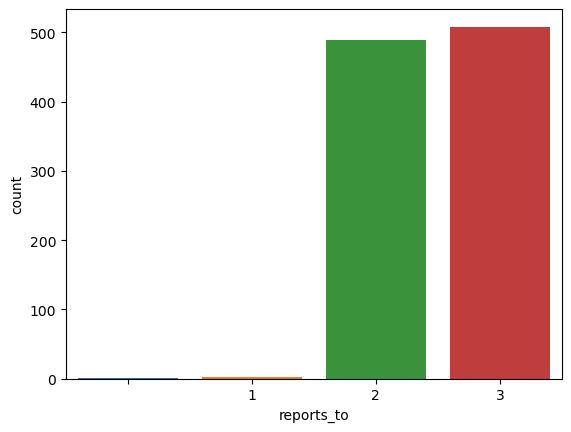

In [26]:
sns.barplot(data=count_df, x='reports_to', y='count')

In [50]:
# Training Model
X = df[['jobRole', 'location']]
y = df['salary']
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X
X_encoded

,jobRole_CEO,jobRole_Customer Service,jobRole_HR,jobRole_Manager,jobRole_Sales,jobRole_Tech,location_Hartford,location_New York,location_St. Paul,location_West Bridgewater
0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,1,0,0,0
996,0,0,0,0,0,1,1,0,0,0
997,0,0,1,0,0,0,0,0,0,1
998,0,0,1,0,0,0,1,0,0,0


In [41]:
# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.0


In [47]:
# Example prediction
example_data = {'jobRole': ['Tech'], 'location': ['Hartford']}
prediction_input_df = pd.DataFrame(example_data)

prediction_input_df

,jobRole,location
0,Tech,Hartford


In [49]:
encoded_input = pd.get_dummies(prediction_input_df)


encoded_input
# prediction = model.predict(encoded_input)
# print(prediction)

,jobRole_Tech,location_Hartford
0,1,1
